<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as mt
import numpy as np
import matplotlib.pylab as plt 


## Exponencial, serie alternante (serie e^n)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

1. Write a program that calculates $e^{-x}$ 


\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


2.   - Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point.


\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{n=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}



3. Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

4. See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

5. By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges.

6. Make a series of graphs of the error versus N for different values of x.

7. Vectorize your  program by using numpy tools.




In [ ]:
# Punto 1.1
from math import e, factorial
import matplotlib.pylab as plt

factorial_v=np.vectorize(factorial,cache=False)


In [ ]:
# N: denota la cantidad de sumandos en la serie.
def serie_exp_1(x,N):
  
  if N>0:
    sum= 0
    n=np.arange(N)            # Rango de valores sobre los que se va a efectuar la suma
    S = ((((-1)**n)*(x**n))/factorial_v(n)).sum()

    return S
  
  elif N==0:
  
    return np.float64(0)

In [ ]:
serie_exp_1(1,0)

0.0

In [ ]:
#-----------------------------------------------------------
def serie_exp_2(x,N):

  if N>0:
    sum= 0
    n=np.arange(N)            # Rango de valores sobre los que se va a efectuar la suma
    S = (((x**n))/factorial_v(n)).sum()

    return 1/S

  elif N==0 :
    return np.float64(0)

In [ ]:
(serie_exp_2(1,0))

1.0

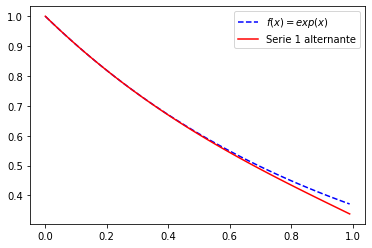

In [ ]:
# Punto 1.2 
# Para comparar la función exponencial incorporada en numpy y la serie que definimos anteriormente, las graficaremos:

N= 4

dom_x= np.arange(0,1,0.01)



y_exact=e**(-dom_x)

y_serie_1= np.array([serie_exp_1(x,N) for x in dom_x])

error_abs_1= np.abs(y_exact-y_serie_1)

  

plt.figure()
plt.plot(dom_x, y_exact,"b--", label="$f(x)=exp(x)$"   )
plt.plot(dom_x,y_serie_1,"r-",label="Serie 1 alternante"   )
plt.legend()
plt.show()





In [ ]:
error_abs_1[-1]


0.03324319102204576

In [ ]:
#n-esimo termino de la serie 

def n_serie_exp1(x,n) :
  term =(((-1)**n)*(x**n))/factorial(n)

  return term


print(n_serie_exp1(1,6))


0.001388888888888889


In [ ]:
eps=1e-7
x=0.5
N=1
np.abs((n_serie_exp1(x,N+1))/serie_exp_1(x,N))

0.125

In [ ]:
while True:
  a=(n_serie_exp1(x,N+1))
  b=serie_exp_1(x,N)

  if np.abs(a/b)> eps:
    N+=1

  else :
    break

print (f' Numero de sumandos para los que se logra la precision ɛ = {eps} : N = {N} ')




 Numero de sumandos para los que se logra la precision ɛ = 1e-07 : N = 8 


In [ ]:
# Punto 1.3

x= 9.99
for i in range(0,11):
  print(f'  Termino  {i} de la serie : ',n_serie_exp1(x,i) )
 # print(f'  suma parcial {i} : ',serie_exp_1(x,i)) #n_serie_exp1(x,i) )
  
 
  

  Termino  0 de la serie :  1.0
  Termino  1 de la serie :  -9.99
  Termino  2 de la serie :  49.90005
  Termino  3 de la serie :  -166.1671665
  Termino  4 de la serie :  415.00249833375005
  Termino  5 de la serie :  -829.1749916708326
  Termino  6 de la serie :  1380.5763611319364
  Termino  7 de la serie :  -1970.2796925297207
  Termino  8 de la serie :  2460.3867660464884
  Termino  9 de la serie :  -2731.0293103116023
  Termino  10 de la serie :  2728.298281001291


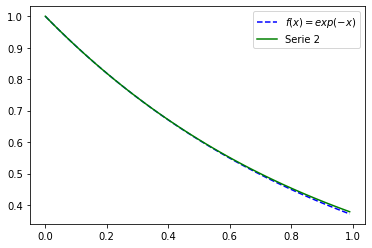

In [ ]:
# Punto 1.4
# Nuevamente,comparamos la función exponencial incorporada en numpy con  la serie que definimos tomando el inverso de la serie de Macclaurin para la funcion exponencial:

N= 4

dom_x= np.arange(0,1,0.01)



y_exact=e**(-dom_x)

y_serie_2= np.array([serie_exp_2(x,N) for x in dom_x])

error_abs_2= np.abs(y_exact-y_serie_2)

  

plt.figure()
plt.plot(dom_x, y_exact,"b--", label="$f(x)=exp(-x)$"   )
plt.plot(dom_x,y_serie_2,"g-",label="Serie 2"   )
plt.legend()
plt.show()


# Cualitativamente observamos que al expresar la serie de la función exponencial como exp(-x) = 1 / exp(x) se logra una mayor precision en el resultado, puesto que ambas curvas casi se superponen por completo

In [ ]:
error_abs_2[-1]

0.006957899374191112

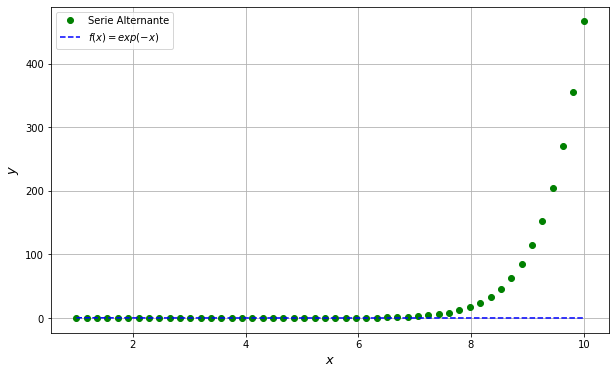

In [ ]:
# Punto 1.5
N=15
X1 = np.linspace(1,10)
Y1= np.array([serie_exp_1(x,N) for x in X1])

yexact_1=e**(-X1)


# Grafico 1

plt.figure(figsize=(10,6))
plt.plot(X1,Y1,"go", label = 'Serie Alternante')
plt.plot(X1,yexact_1,"b--", label="$f(x)=exp(-x)$" )
plt.xlabel("$x$",fontsize =13)
plt.ylabel("$y $",fontsize =13)
#plt.title(" ")
plt.legend(loc=0)
plt.grid()
plt.show()

In [ ]:
yexact_1
Y1

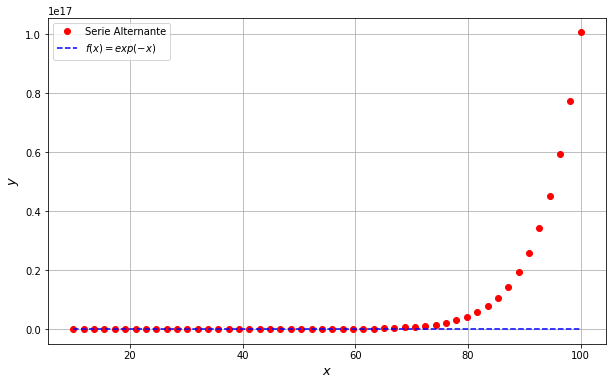

In [ ]:

N=15
X2= np.linspace(10,100)
Y2= np.array([serie_exp_1(x,N) for x in X2])

yexact_2=e**(-X2)

# Grafico 2

plt.figure(figsize=(10,6))
plt.plot(X2,Y2,"ro", label = 'Serie Alternante')
plt.plot(X2,yexact_2,"b--", label="$f(x)=exp(-x)$" )
plt.xlabel("$x$",fontsize =13)
plt.ylabel("$y $",fontsize =13)
#plt.title(" ")
plt.legend(loc=0)
plt.grid()
plt.show()

In [ ]:
Y2

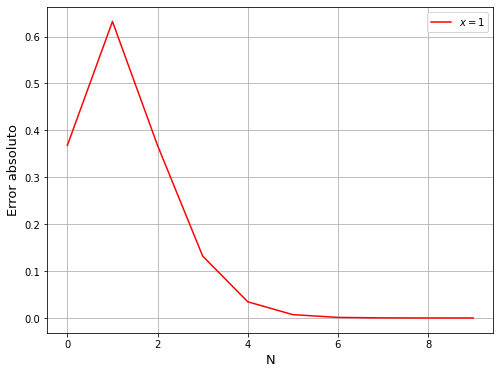

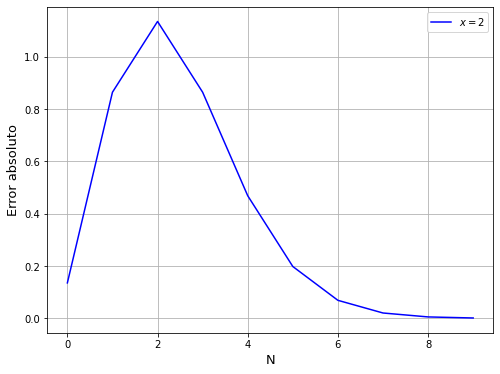

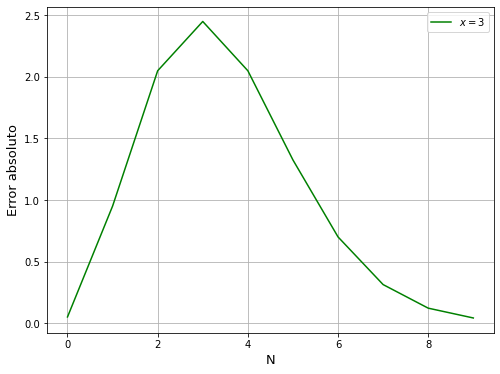

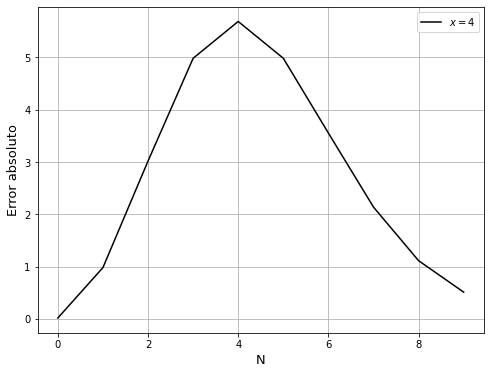

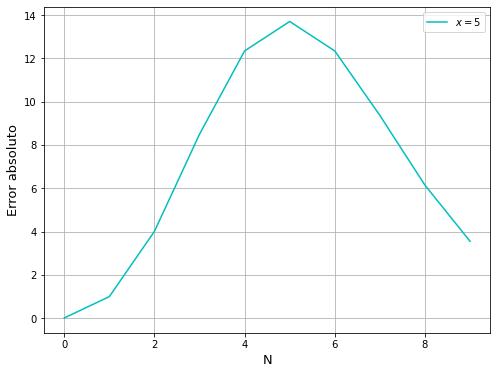

In [ ]:
# Punto 1.6 : Graficas de Error absoluto vs Numero de sumandos (N), para distintos valores de x

#fig = plt.figure(figsize=(15,15))
#fig.tight_layout()
#colores=['red','blue','lime','darkorchid','orange']


N_rang =np.arange(10)

color=['r','b','g','k','c']

for i in range (1,6):
  x=i

  y_exact=e**(-x)

  y_serie_1= np.array([serie_exp_1(x,N) for N in N_rang])

  error_abs_1=np.abs(y_exact - y_serie_1)
  
  plt.figure(figsize=(8,6))
  plt.plot(N_rang ,error_abs_1, color=color[i-1], label=f"$x = {i}$")
  plt.xlabel('N',fontsize =13)
  plt.ylabel('Error absoluto',fontsize =13)
  #plt.title(" ")
  plt.legend(loc=0)
  plt.grid()
  plt.show()





## Cancelación sustractiva



**Serie S_n**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
# Punto 2.1:

def S1(N):
  
  N=2*N
  r = np.arange(1,N+1)
  s1= (((-1)**r)*(r/(r+1))).sum()

  return s1



def S2(N):

  r = np.arange(1,N+1)
  par = ((2*r)/(2*r +1)).sum()
  impar = ((2*r -1)/(2*r)).sum()
  s2 =par - impar
 

  return s2


def S3(N):

  r = np.arange(1,N+1)
  s3 = (1/(2*r*(2*r +1))).sum()

  return s3




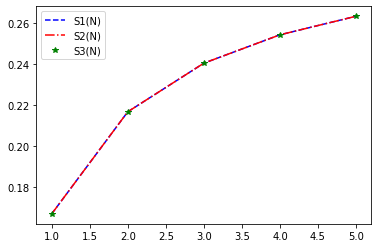

In [ ]:
x_r=np.arange(1,6)
y_r1=np.array([S1(x) for x in x_r])
y_r2=np.array([S2(x) for x in x_r])
y_r3=np.array([S3(x) for x in x_r])


plt.figure()

plt.plot(x_r, y_r1,"b--", label="S1(N)" )
plt.plot(x_r,y_r2,"r-.",label="S2(N)" )
plt.plot(x_r,y_r2,"g*",label="S3(N)" )

plt.legend()
plt.show()


In [ ]:

N_f = np.linspace(1,1e6)

y_exact=np.array([S3(n) for n in N_f]) # Consideramos, tal como nos pide el enunciado, el valor de la Serie 3 como solucion exacta

y_appr1=np.array([S1(n) for n in N_f])
y_appr2=np.array([S2(n) for n in N_f])

E1=(np.abs(y_appr1 -y_exact ))/y_exact
E2=(np.abs(y_appr2 -y_exact ))/y_exact


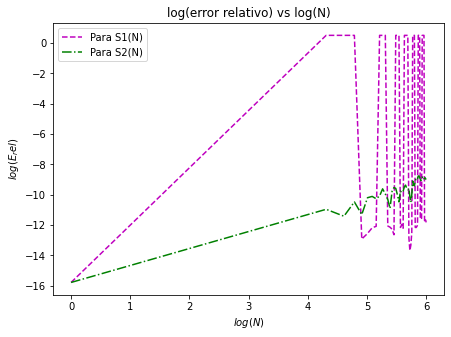

In [ ]:
xlog=np.log10(N_f)
y1log=np.log10(E1)
y2log=np.log10(E2)

plt.figure(figsize=(7,5))

plt.title('log(error relativo) vs log(N)')
plt.plot(xlog, y1log,"m--", label= "Para S1(N)" )
plt.plot(xlog, y2log,"g-.",label= "Para S2(N)" )

plt.xlabel('$log(N)$')
plt.ylabel('$log(E_rel)$')


plt.legend()
plt.show()